# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from xgboost import XGBClassifier
import numpy as np

# Load data
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = [line.strip().split(' ', 1) for line in file]
    return pd.DataFrame(lines, columns=['label', 'text'])

# Load training and testing data
train_df = load_data('stsa-train.txt')
test_df = load_data('stsa-test.txt')

# Split the training data into train and validation sets
train_set, validation_set = train_test_split(train_df, test_size=0.2, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = vectorizer.fit_transform(train_set['text'])
X_validation = vectorizer.transform(validation_set['text'])
X_test = vectorizer.transform(test_df['text'])
y_train = train_set['label'].astype(int)
y_validation = validation_set['label'].astype(int)
y_test = test_df['label'].astype(int)

# Define models
models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models using 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validation)
    results[name] = {
        'CV Accuracy': np.mean(cv_scores),
        'Validation Accuracy': accuracy_score(y_validation, y_pred),
        'Recall': recall_score(y_validation, y_pred, pos_label=1),
        'Precision': precision_score(y_validation, y_pred, pos_label=1),
        'F1 Score': f1_score(y_validation, y_pred, pos_label=1)
    }

# Display results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")






Results for MultinomialNB:
CV Accuracy: 0.7697
Validation Accuracy: 0.7825
Recall: 0.8892
Precision: 0.7407
F1 Score: 0.8082


Results for SVM:
CV Accuracy: 0.7513
Validation Accuracy: 0.7941
Recall: 0.8317
Precision: 0.7823
F1 Score: 0.8063


Results for KNN:
CV Accuracy: 0.5325
Validation Accuracy: 0.5354
Recall: 0.9930
Precision: 0.5260
F1 Score: 0.6877


Results for Decision Tree:
CV Accuracy: 0.6382
Validation Accuracy: 0.6698
Recall: 0.7335
Precision: 0.6620
F1 Score: 0.6959


Results for Random Forest:
CV Accuracy: 0.7157
Validation Accuracy: 0.7319
Recall: 0.7938
Precision: 0.7165
F1 Score: 0.7532


Results for XGBoost:
CV Accuracy: 0.6772
Validation Accuracy: 0.7001
Recall: 0.8527
Precision: 0.6623
F1 Score: 0.7456




## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


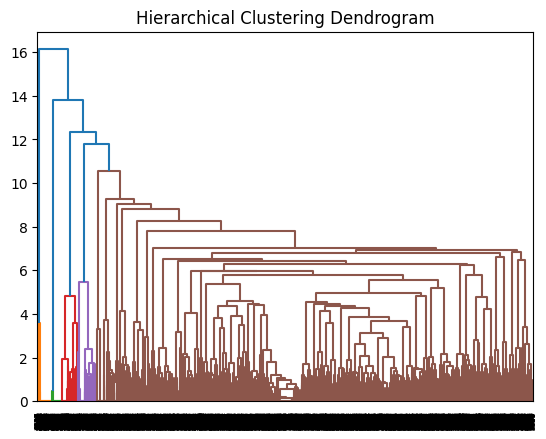

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

K-means Labels: [3 0 3 ... 3 3 3]
DBSCAN Labels: [ 0  0  0 ... -1  0  0]


In [7]:
!pip install sentence-transformers
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer

# Load data
data = pd.read_csv('Amazon_Unlocked_Mobile.csv')
data = resample(data, n_samples=5000, random_state=42)
data.reset_index(drop=True, inplace=True)

# Clean and preprocess the reviews
data['Reviews'] = data['Reviews'].dropna().apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Feature Extraction with TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = tfidf.fit_transform(data['Reviews'])

# Dimensionality Reduction
ipca = IncrementalPCA(n_components=50)
X_ipca = ipca.fit_transform(X_tfidf.toarray())

# Clustering
kmeans = KMeans(n_clusters=5)
labels_kmeans = kmeans.fit_predict(X_ipca)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_ipca)
linkages = linkage(X_ipca, method='ward')
dendrogram(linkages)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Word2Vec
words = [text.split() for text in data['Reviews']]
w2v_model = Word2Vec(words, vector_size=100, min_count=2)
w2v_model.train(words, total_examples=w2v_model.corpus_count, epochs=10)

# BERT Embeddings
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
bert_embeddings = bert_model.encode(data['Reviews'])

# Print Clustering labels
print("K-means Labels:", labels_kmeans)
print("DBSCAN Labels:", labels_dbscan)




**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.The numerous clustering algorithms used to the Amazon reviews dataset would provide diverse findings depending on the nature of each methodology. K-means would normally divide the reviews into a set number of clusters (e.g., five), grouping texts with comparable phrase frequencies, which can occasionally shove outliers into less acceptable groupings. DBSCAN, being density-based, would focus on high-density areas, perhaps leaving certain outlier reviews unclustered if they did not meet the density standards. Hierarchical clustering would produce a dendrogram, which is a visual depiction of the review clusters at various degrees of granularity and is valuable for data hierarchical organizing. Word2Vec would provide grouping based on semantic similarity rather than word frequency, potentially catching deeper language trends in the dataset. BERT, which uses sophisticated language model embeddings, is expected to provide the most semantically coherent clusters, reflecting details in language use throughout the reviews.


.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [8]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
These activities most likely helped you consolidate fundamental ideas in machine learning and natural language processing, as well as provide a platform for applying theoretical knowledge in a practical situation





'''

'\nPlease write you answer here:\nThese activities most likely helped you consolidate fundamental ideas in machine learning and natural language processing, as well as provide a platform for applying theoretical knowledge in a practical situation\n\n\n\n\n\n'